## Problema 1

Vamos resolver um problema de difração de luz utilizando transformadas de Fourier. 

Considere uma onda se movendo em $z < 0$ com comprimento de onda $\lambda$. O número de onda é dado por $ k = 2\pi/\lambda$.

Essa onda incide em uma placa contendo uma fenda em $z = 0$ e queremos ver o resultado em uma tela posicionada em $z = L$.

Para estimar numericamente o padrão de difração dessa luz, podemos discretizar o sistema e utilizar o pacote `fft` do SciPy.

![](https://rafael-fuente.github.io/images/angular-spectral-method/angular-spectral-method-single-slit-diffraction.png)

Fonte: <https://rafael-fuente.github.io>

Referência: Introduction to Fourier Optics, Joseph Goodman

### Item (a)

Considere que o plano no qual a luz irá incidir seja definido por um retângulo em $-L_x<x<L_x$ e $-L_y < y < L_y$. O eixo $x$ será discretizado em $N_x$ pontos, e o $y$ em $N_y$ pontos.

Vamos considerar:

$L_x = 1400~\mu\text{m}, L_y = 400~\mu\text{m}$, com $N_x = 2500$ e $N_y = 1500$ pontos.

- Defina as variáveis `Lx,Ly,Nx,Ny` com seus respectivos valores.

- Crie as arrays `x` e `y` e um *meshgrid* `xc,yc`.

- Defina uma array bidimensional com nome `f` com valores iguais a zero, com o mesmo *shape* do *meshgrid* criado.

- Execute o seguinte código para conferência:

```python
print(xc.shape, yc.shape, f.shape)
print(xc.min(), xc.max(), yc.min(), yc.max())
print(f.min(), f.max())
```

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Lx,Ly,Nx,Ny = 1400,400,2500,1500
x = np.linspace(-Lx, Lx, Nx) #Criando os linspace com as caractersiticas do problema 
y = np.linspace(-Ly, Ly, Ny)

xc, yc = np.meshgrid(x,y)
f = np.zeros_like(xc)


#testes#
print(xc.shape, yc.shape, f.shape)
print(xc.min(), xc.max(), yc.min(), yc.max())
print(f.min(), f.max())

(1500, 2500) (1500, 2500) (1500, 2500)
-1400.0 1400.0 -400.0 400.0
0.0 0.0


### Item (b)

A função $f(x_{n_x},y_{n_y})$ recebe um valor igual 1 nas posições da fenda, e 0 onde não há. A variável `f` definida anteriormente representa essa função discretizada.

Na célula abaixo foi definida uma função chamada `criar_fenda(xc,yc,f,x0,y0,R)` para criar fendas circulares. Ela recebe como parâmetro as variáveis `xc,yc,f` definidas acima, e mais 3 argumentos:

> `x0`: posição $x$ do centro da fenda

> `y0`: posição $y$ do centro da fenda

> `R`: raio da fenda

**Faça:**

- Crie um fenda na origem, de raio igual a $22~\mu\text{m}$.

- Utilize o código

```python
ax.imshow(f, extent = [-Lx, Lx, -Ly, Ly], cmap="gray")
```

para mostrar a placa. *(o `extent` é explicado no vídeo do professor sobre a lista)*

- Formate os eixos para seus respectivos nomes e unidades.

*Dica: utilize `ax.set_aspect("equal")` para melhorar a proporção do gráfico.*


In [6]:
# EXECUTE AQUI!
def criar_fenda(xc,yc,f,x0,y0,R):
  f[((xc-x0)**2 + (yc-y0)**2 < R**2)] = 1

Text(0, 0.5, '$y(\\mu m)$')

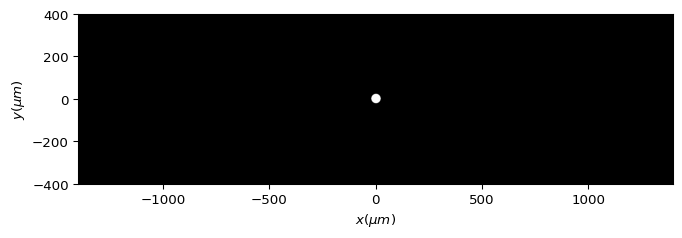

In [7]:
R = 22
x0,y0 = 0,0
f = np.zeros_like(xc) #sempre carregar esse codigo nas células 
criar_fenda(xc,yc,f,x0,y0,R)

fig = plt.figure(figsize=(8,6), dpi=96) #definindo as caracteristicas da imagem
ax = plt.gca()
ax.imshow(f, extent = [-Lx, Lx, -Ly, Ly], cmap="gray")
ax.set_xlabel(r"$x(\mu m)$")
ax.set_ylabel(r"$y(\mu m)$")

### Item (c)

O resultado da função de onda em $z = L$ pode ser aproximado por uma integral de Fresnel. Após a discretização, precisamos fazer a transformada de Fourier discreta (DFT) da função

$$g(x,y) = f(x,y) e^{\frac{ik}{2L}\left( x^2 + y^2\right)},$$

resultando em

$$\begin{gathered}
  G(x'_{n_x}, y'_{n_y}) = \sum _{n_{x}=0}^{N_{x}-1}\sum _{n_{y}=0}^{N_{y}-1}g(x_{n_{x}},y_{n_{y}})e^{-{i2\pi x'_{n_x}{\frac {n_{x}}{N_{x}}} -{i2\pi y'_{n_y}{\frac {n_{y}}{N_{y}}}}}}.
\end{gathered}$$

O valor de $\left|G(\mu_{x}, \mu_{y})\right|$ nos dá a amplitude nos pontos de observação $(x'_{n_x}, y'_{n_y})$ da tela, dados por

$$\begin{gathered}
x'_{n_x}  = \frac{(n_x - N_{x}/2) L \lambda}{2 L_{x}} \\
y'_{n_y}  = \frac{(n_y - N_{y}/2) L \lambda}{2 L_{y}}
\end{gathered}.$$

Vamos fazer isso de forma eficiente utilizando o pacote `fft` do SciPy.

**Faça**:

- Defina variáveis para a distância $L = 5~\text{m} = 5\times 10^6~\mu\text{m}$, comprimento de onda $\lambda = 1.85~\text{nm} = 0.00185~\mu\text{m}$, e número de onda $k = 2\pi/\lambda$.

- Importe o pacote `fft` do SciPy com o nome `spfft`.

- Aplique a função `spfft.fft2` na função $g(x,y)$, que no caso é dada pela multiplicação da variável `f` no item (a) pela exponencial utilizando o resultado do *meshgrid*. Salve o resultado em uma variável chamada `fft_G`.

- Aplique a função `spfft.fftshift` na variável `fft_G`, salvando o resultado como variável `G`. Isso é necessário para centralizar a transformação em torno de $x' = y' = 0$.

- Depois de fazer tudo isso, ajeite o código abaixo para mostrar o gráfico, acrescentando os comandos para indicar os valores dos eixos e a escala de cor para a amplitude. O gráfico de cima mostra a intensidade relativa ao máximo ao longo de $y = 0$, e o de baixo mostra o padrão de difração.

In [8]:
#definindo as constantes
L = 5*(10**6)
lb = 0.00185
k = (2*np.pi)/(lb)
i = 1j
#---------------------#

import scipy.fft as spfft

valor = ((i*k)/(2*L))*(xc**2 + yc**2)
fft_G = spfft.fft2(f * np.exp(valor))
G = spfft.fftshift(fft_G)

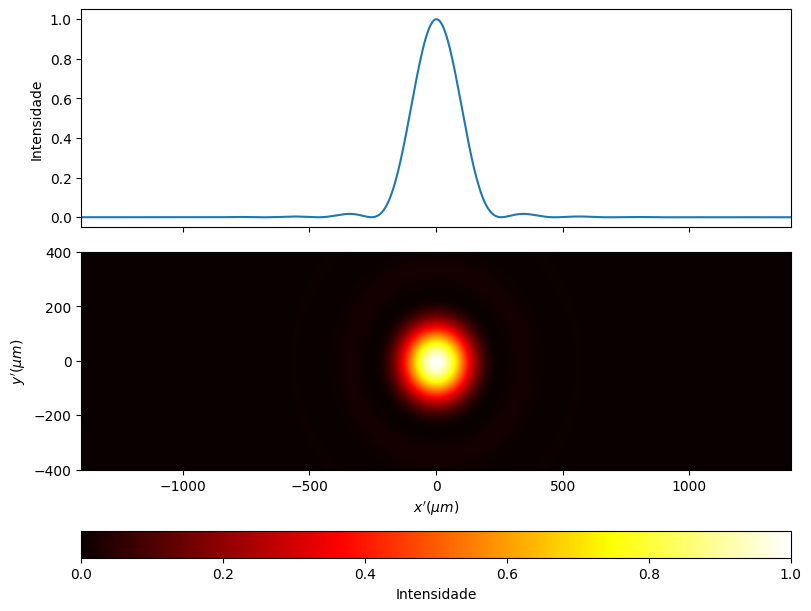

In [9]:
# MODIFIQUE ESSE CÓDIGO PARA MOSTRAR O GRÁFICO CORRETAMENTE

# acrescente aqui
fig, ax = plt.subplots(2,1,sharex= True ,figsize=(8,6), dpi=100,constrained_layout=True)

# NÃO MODIFIQUE:
Lx_screen = Nx*L*lb/(4*Lx)
Ly_screen = Ny*L*lb/(4*Ly)
abs_G = np.absolute(G)
ax[0].plot(np.linspace(-Lx_screen,Lx_screen, len(abs_G[0])), abs_G[len(abs_G)//2]**2/(abs_G**2).max())
grafico = ax[1].imshow(abs_G**2/(abs_G**2).max(), cmap ='hot', extent = [-Lx_screen,Lx_screen,-Ly_screen,Ly_screen], interpolation = "bilinear", aspect="auto")
ax[1].set_xlim([-Lx,Lx])
ax[1].set_ylim([-Ly,Ly])
# / fim

ax[0].set_ylabel(r"Intensidade")
ax[1].set_ylabel(r"$y' (\mu m)$")
ax[1].set_xlabel(r"$x' (\mu m)$")

# ativar a colorbar e label?
cbar = fig.colorbar(grafico , orientation="horizontal", label = 'Intensidade'),

### Item (d)

Repita tudo o que foi feito acima, agora com duas fendas do mesmo tamanho da anterior, separadas por uma distância $D = 128~\mu\text{m}$ e depois por $D = 500~\mu\text{m}$, em torno da origem.

Não se esqueça de zerar a variável `f` antes de criar as fendas novamente.

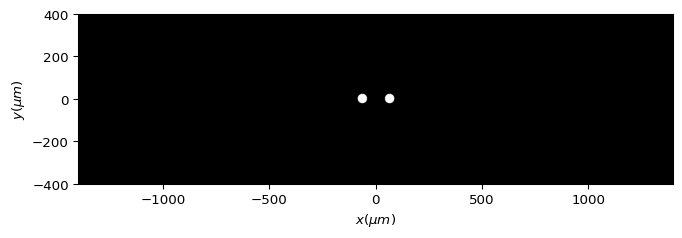

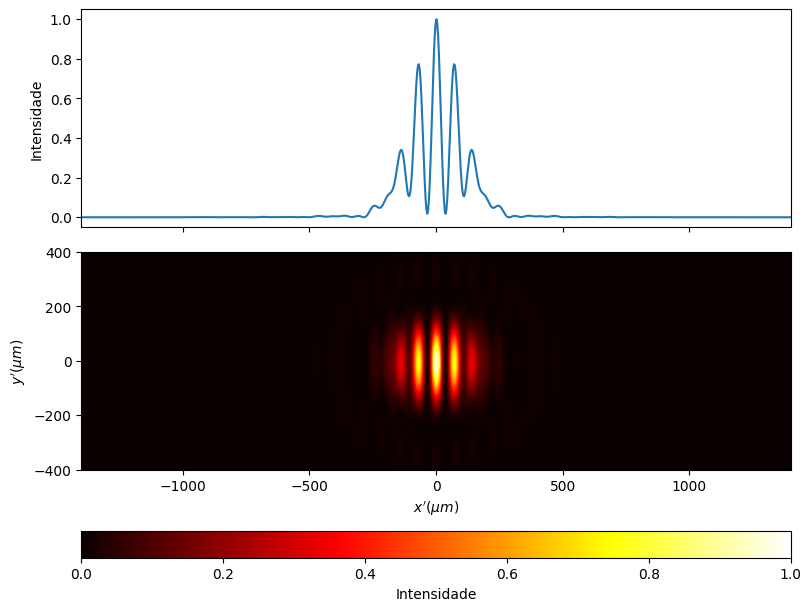

In [10]:
R = 22
x0,y0 = 64,0
f = np.zeros_like(xc) #sempre carregar esse f pra não dar ruim 
criar_fenda(xc,yc,f,x0,y0,R)
criar_fenda(xc,yc,f,-x0,y0,R)



fig = plt.figure(figsize=(8,6), dpi=96)
axa = plt.gca()
axa.imshow(f, extent = [-Lx, Lx, -Ly, Ly], cmap="gray")
axa.set_xlabel(r"$x(\mu m)$")
axa.set_ylabel(r"$y(\mu m)$")


fft_G = spfft.fft2(f * np.exp(valor))
G = spfft.fftshift(fft_G)


# MODIFIQUE ESSE CÓDIGO PARA MOSTRAR O GRÁFICO CORRETAMENTE

# acrescente aqui
fig, ax = plt.subplots(2,1,sharex= True ,figsize=(8,6), dpi=100,constrained_layout=True)

# NÃO MODIFIQUE:
Lx_screen = Nx*L*lb/(4*Lx)
Ly_screen = Ny*L*lb/(4*Ly)
abs_G = np.absolute(G)
ax[0].plot(np.linspace(-Lx_screen,Lx_screen, len(abs_G[0])), abs_G[len(abs_G)//2]**2/(abs_G**2).max())
grafico = ax[1].imshow(abs_G**2/(abs_G**2).max(), cmap ='hot', extent = [-Lx_screen,Lx_screen,-Ly_screen,Ly_screen], interpolation = "bilinear", aspect="auto")
ax[1].set_xlim([-Lx,Lx])
ax[1].set_ylim([-Ly,Ly])
# / fim

ax[0].set_ylabel(r"Intensidade")
ax[1].set_ylabel(r"$y' (\mu m)$")
ax[1].set_xlabel(r"$x' (\mu m)$")

# ativar a colorbar e label?
cbar = fig.colorbar(grafico , orientation="horizontal", label = 'Intensidade'),

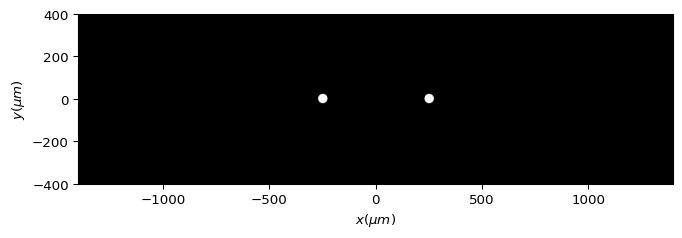

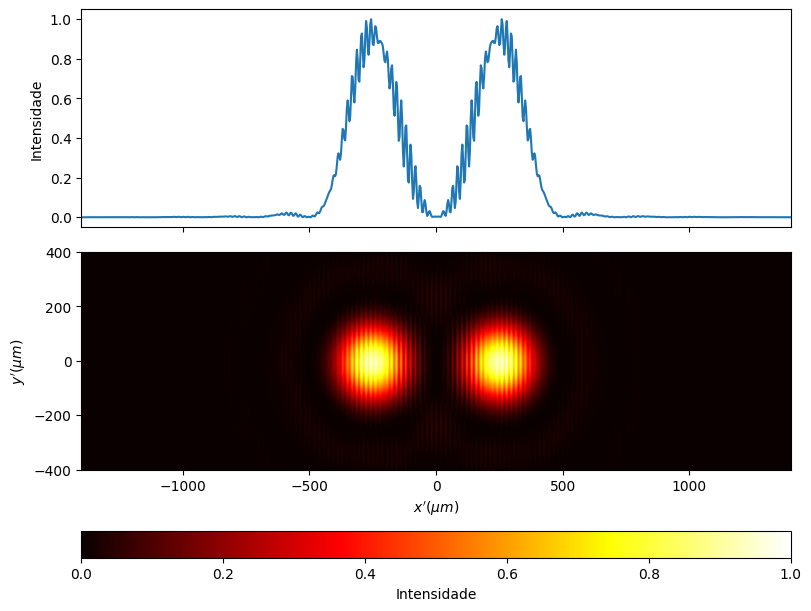

In [11]:
R = 22
x0,y0 = 250,0
f = np.zeros_like(xc)
criar_fenda(xc,yc,f,x0,y0,R)
criar_fenda(xc,yc,f,-x0,y0,R)


fig = plt.figure(figsize=(8,6), dpi=96)
axa = plt.gca()
axa.imshow(f, extent = [-Lx, Lx, -Ly, Ly], cmap="gray")
axa.set_xlabel(r"$x(\mu m)$")
axa.set_ylabel(r"$y(\mu m)$")

fft_G = spfft.fft2(f * np.exp(valor))
G = spfft.fftshift(fft_G)


# MODIFIQUE ESSE CÓDIGO PARA MOSTRAR O GRÁFICO CORRETAMENTE

# acrescente aqui
fig, ax = plt.subplots(2,1,sharex= True ,figsize=(8,6), dpi=100,constrained_layout=True)

# NÃO MODIFIQUE:
Lx_screen = Nx*L*lb/(4*Lx)
Ly_screen = Ny*L*lb/(4*Ly)
abs_G = np.absolute(G)
ax[0].plot(np.linspace(-Lx_screen,Lx_screen, len(abs_G[0])), abs_G[len(abs_G)//2]**2/(abs_G**2).max())
grafico = ax[1].imshow(abs_G**2/(abs_G**2).max(), cmap ='hot', extent = [-Lx_screen,Lx_screen,-Ly_screen,Ly_screen], interpolation = "bilinear", aspect="auto")
ax[1].set_xlim([-Lx,Lx])
ax[1].set_ylim([-Ly,Ly])
# / fim

ax[0].set_ylabel(r"Intensidade")
ax[1].set_ylabel(r"$y' (\mu m)$")
ax[1].set_xlabel(r"$x' (\mu m)$")

# ativar a colorbar e label?
cbar = fig.colorbar(grafico , orientation="horizontal", label = 'Intensidade'),